In [ ]:
!pip install -U yellowbrick
!pip install scikit-plot
!pip install mlrose
!pip install autoviz
!pip install kmeans-smote
!pip uninstall numpy
!pip uninstall pandas
!pip install numpy 
!pip install pandas
!pip install pyfiglet
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import scikitplot as skplt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Preprocessing
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Models Classifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Metrix_Score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import scikitplot as skplt
import sys
import six
sys.modules['sklearn.externals.six']=six
import mlrose
from yellowbrick.classifier.rocauc import roc_auc
from kmeans_smote import KMeansSMOTE
from autoviz.AutoViz_Class import AutoViz_Class
import pyfiglet
from catboost import CatBoostClassifier
import joblib

# TensorFlow

import tensorflow as tf

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Datasets/micro credit.csv'
data = pd.read_csv(path)

**Lets Have a look on our Dataset**

In [ ]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [ ]:
## Checking Output Variable for Imbalancing Data

data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

## Point -
**My data is totaly imbalanced**

## Checking for Null values

In [ ]:
data.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

We don't have any **Null Values** in this dataset

Now I am going to Describe(*Works only on Numerical Columns*) the dataset.
Lets see **Mean, Minimum values, Maximum values**

In [ ]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Due to **Describe function** I am able to see that, in this dataset some values that have **very -ve** values as **minimum values** and these values are **Wrong** so I have to **Remove** them.

## Lets Take a quick **Information** about **Columns**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

I can see in my dataset have only **Three Columns** that are **Object** and rest of all are **Int** and **Float**

## We can see how many **Unique values** have in each **columns** of this **Dataset**

In [ ]:
# I am going to make a dictionary and in this i will see all the columns as key and values as values sepreted by (,)

{column:len(data[column].unique()) for column in data.select_dtypes(exclude='object').columns}

{'Unnamed: 0': 209593,
 'amnt_loans30': 48,
 'amnt_loans90': 69,
 'aon': 4507,
 'cnt_da_rech30': 1066,
 'cnt_da_rech90': 27,
 'cnt_loans30': 40,
 'cnt_loans90': 1110,
 'cnt_ma_rech30': 71,
 'cnt_ma_rech90': 110,
 'daily_decr30': 147025,
 'daily_decr90': 158669,
 'fr_da_rech30': 1072,
 'fr_da_rech90': 46,
 'fr_ma_rech30': 1083,
 'fr_ma_rech90': 89,
 'label': 2,
 'last_rech_amt_ma': 70,
 'last_rech_date_da': 1174,
 'last_rech_date_ma': 1186,
 'maxamnt_loans30': 1050,
 'maxamnt_loans90': 3,
 'medianamnt_loans30': 6,
 'medianamnt_loans90': 6,
 'medianamnt_ma_rech30': 510,
 'medianamnt_ma_rech90': 608,
 'medianmarechprebal30': 30428,
 'medianmarechprebal90': 29785,
 'payback30': 1363,
 'payback90': 2381,
 'rental30': 132148,
 'rental90': 141033,
 'sumamnt_ma_rech30': 15141,
 'sumamnt_ma_rech90': 31771}

**Now I will see the uniqe values in Object columns**

In [ ]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'msisdn': 186243, 'pcircle': 1, 'pdate': 82}

## Object Columns -

1- There are many **Unique Values** in **msisdn: 186243 values** column. So i am going to drop it.

2- In **pcircle** column have only **one** value. Because it will **not** **contribute** for **output**.

3- I have column **pdate**. I will **convert** it into **date** and **month**. Because **year** is **same** for all so it will **not** **contribute** for **output**.

In [ ]:
data['pdate'].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

As i have **same year**

## Now i am goin to do some **Preprocessing**
  - **Removing** all the -**ve values**.
  - **Dropping** some **catagorical** **columns**.
  - Creating Columns **Months** and **Day**
  - Data into **X** and **y** 

In [ ]:
def preprocess(df):
  df = df.copy()
  # Removing -ve Values
  df=df.loc[(df['aon']>=0) & (df['daily_decr30']>=0) & (df['rental30']>=0) & (df['last_rech_date_ma']>=0) & (df['last_rech_date_da']>=0) & (df['medianmarechprebal30']>=0)]
  # Dropping Some columns
  df = df.drop(['msisdn', 'pcircle', 'Unnamed: 0'], axis=1)
  # Converting pdate column in a propper date formate
  df['pdate'] = pd.to_datetime(df['pdate'])
  # Creating Year, Month and Day
  df['Year'] = df['pdate'].dt.year
  df['Month'] = df['pdate'].dt.month 
  df['Day'] = df['pdate'].dt.day
  # Dropping Year and pdate because we don't need them
  df = df.drop(['pdate', 'Year'], axis=1)
  # Making X and y for future uses
  X = df.drop('label', axis=1)
  y = df['label']
  return df

**Appling Preprocessing Function**

In [ ]:
data = preprocess(data)

# Lets See Our Dataset

In [ ]:
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [ ]:
#data.to_csv("New_micro.csv")

# Lets Do **EDA**

In [ ]:
# new_file = r'/content/drive/MyDrive/Colab Notebooks/Datasets/New_micro.csv'
# av = AutoViz_Class()
# filename = new_file
# sep = ','
# dft = av.AutoViz(
#     filename,
#     sep=',',
#     depVar="",
#     dfte=None,
#     header=0,
#     verbose=0,
#     lowess=False,
#     chart_format="svg",
#     max_rows_analyzed=150000,
#     max_cols_analyzed=40
# )

In [ ]:
X = data.drop(['label'], axis=1)
y = data['label']
x=X 

# Now we will check the high correlation between columns.
## If yes then we drop one of them

In [ ]:
X_corr=X.corr()

<AxesSubplot:>

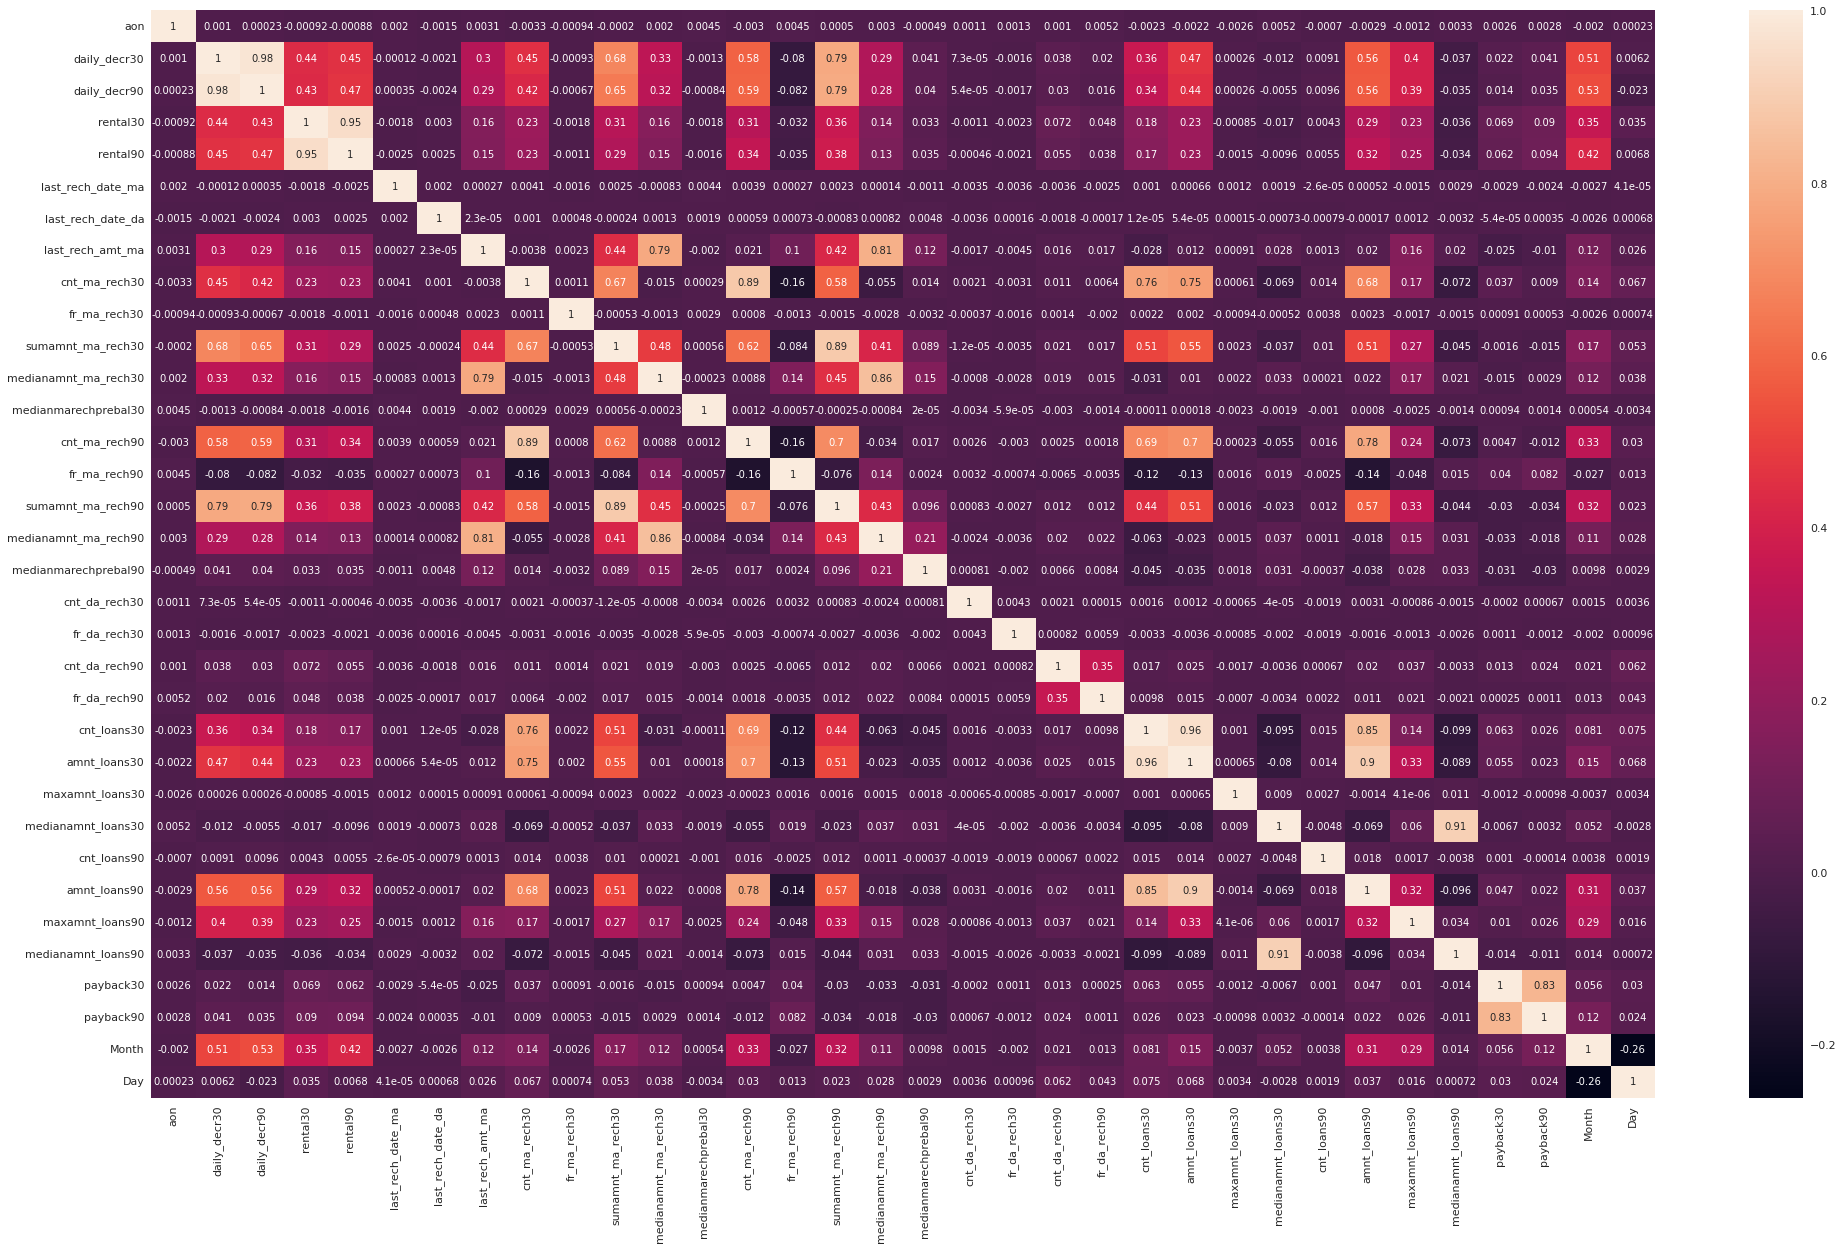

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(X_corr,annot=True)

**I can see there are some columns those are highly correlated with each other so i have to find them.**

In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        print(corr_matrix.iloc[i,j],corr_matrix.columns[i],corr_matrix.columns[j])
        col_corr.add(colname)
        return col_corr

In [ ]:
corr_features=correlation(X, 0.90)

0.9773880668638644 daily_decr90 daily_decr30


In [ ]:
X=X.drop(['daily_decr30','rental30','amnt_loans30','cnt_loans30','medianamnt_loans30'],axis=1)

**These columns were highly correlated so i dropped them and these all columns was having more then 90% correlation and i have dropped 30 days columns not 90 days because 90 days will give us more information as comapre to 30 days**

# Now we look on **Maximum** ammount of loan taken by user in last 90 days and **Average** payback time in days over last 90 days

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='payback90'>

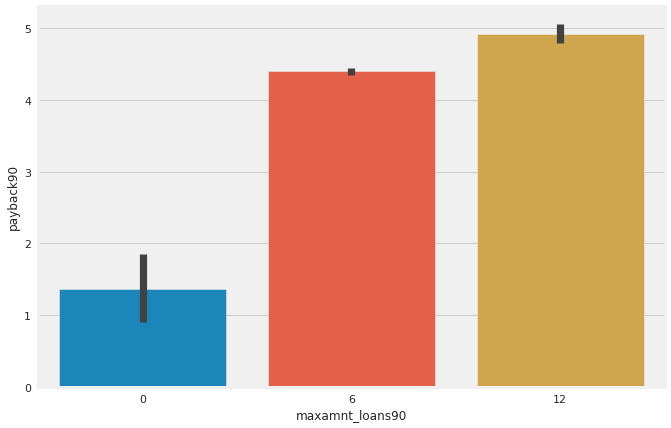

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='maxamnt_loans90',y='payback90',data=X)

**Frequency of data account recharged in last 90 days and payback in 90 days**

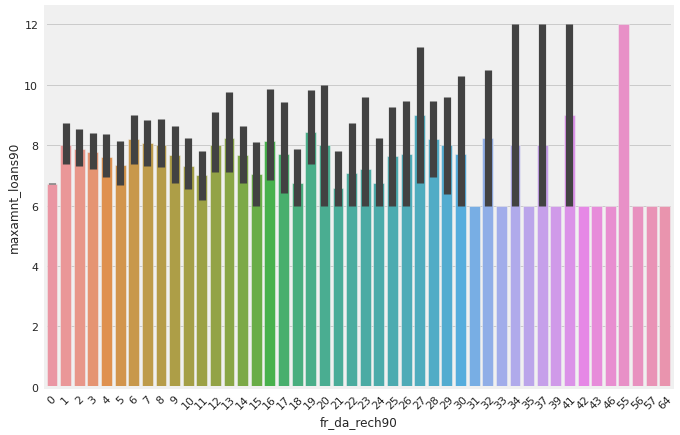

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='fr_da_rech90',y='maxamnt_loans90',data=X);
plt.xticks(rotation=45);

**Number of days till last recharge of data account	vs month**


<AxesSubplot:xlabel='Month', ylabel='last_rech_date_ma'>

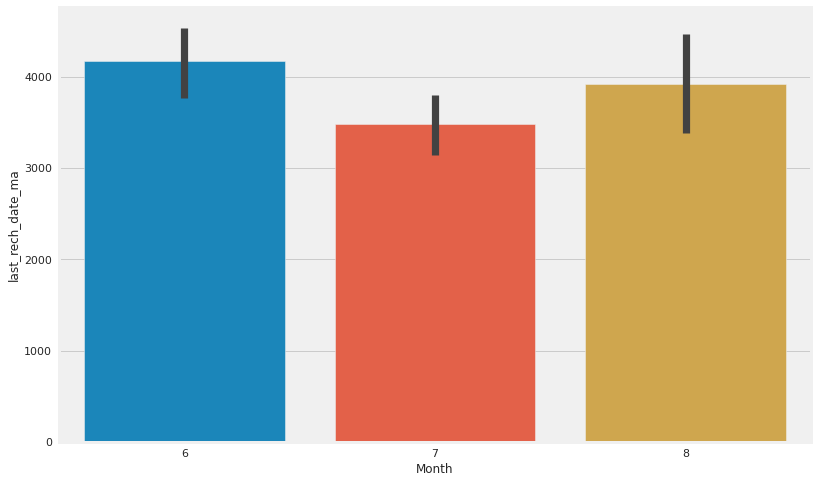

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='last_rech_date_ma',x='Month',data=X)

In [ ]:
X_col = X.columns.values

#Checking Outliers

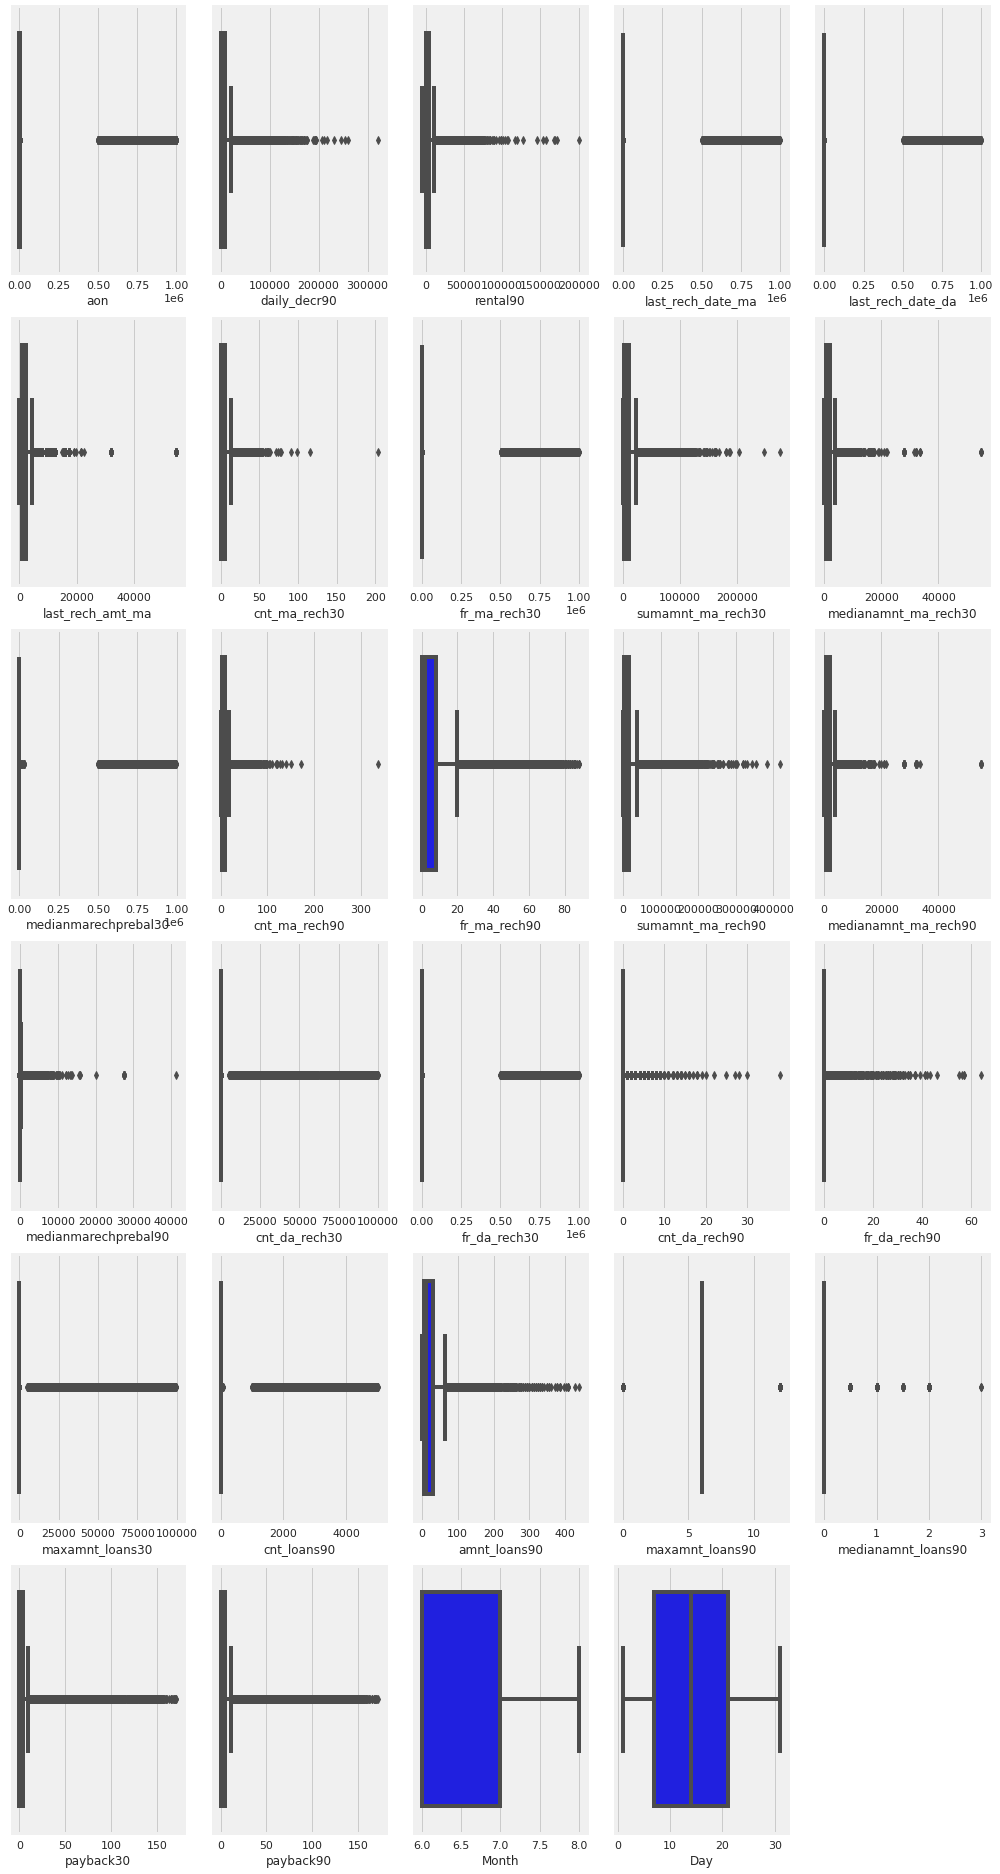

In [ ]:
plt.figure(figsize=(14,30))
for i in range(0,len(X_col)):
  plt.subplot(7,5,i+1)
  ax=sns.boxplot(X[X_col[i]],color='blue')
  plt.tight_layout()

**We have lots of Outlier lets see what can we do**

# Removing **Outliers**

In [ ]:
for col in X.columns:
  percentile = X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]] = percentile[0]
  X[col][X[col]>=percentile[1]] = percentile[1]

# Checking **Outliers** after removal

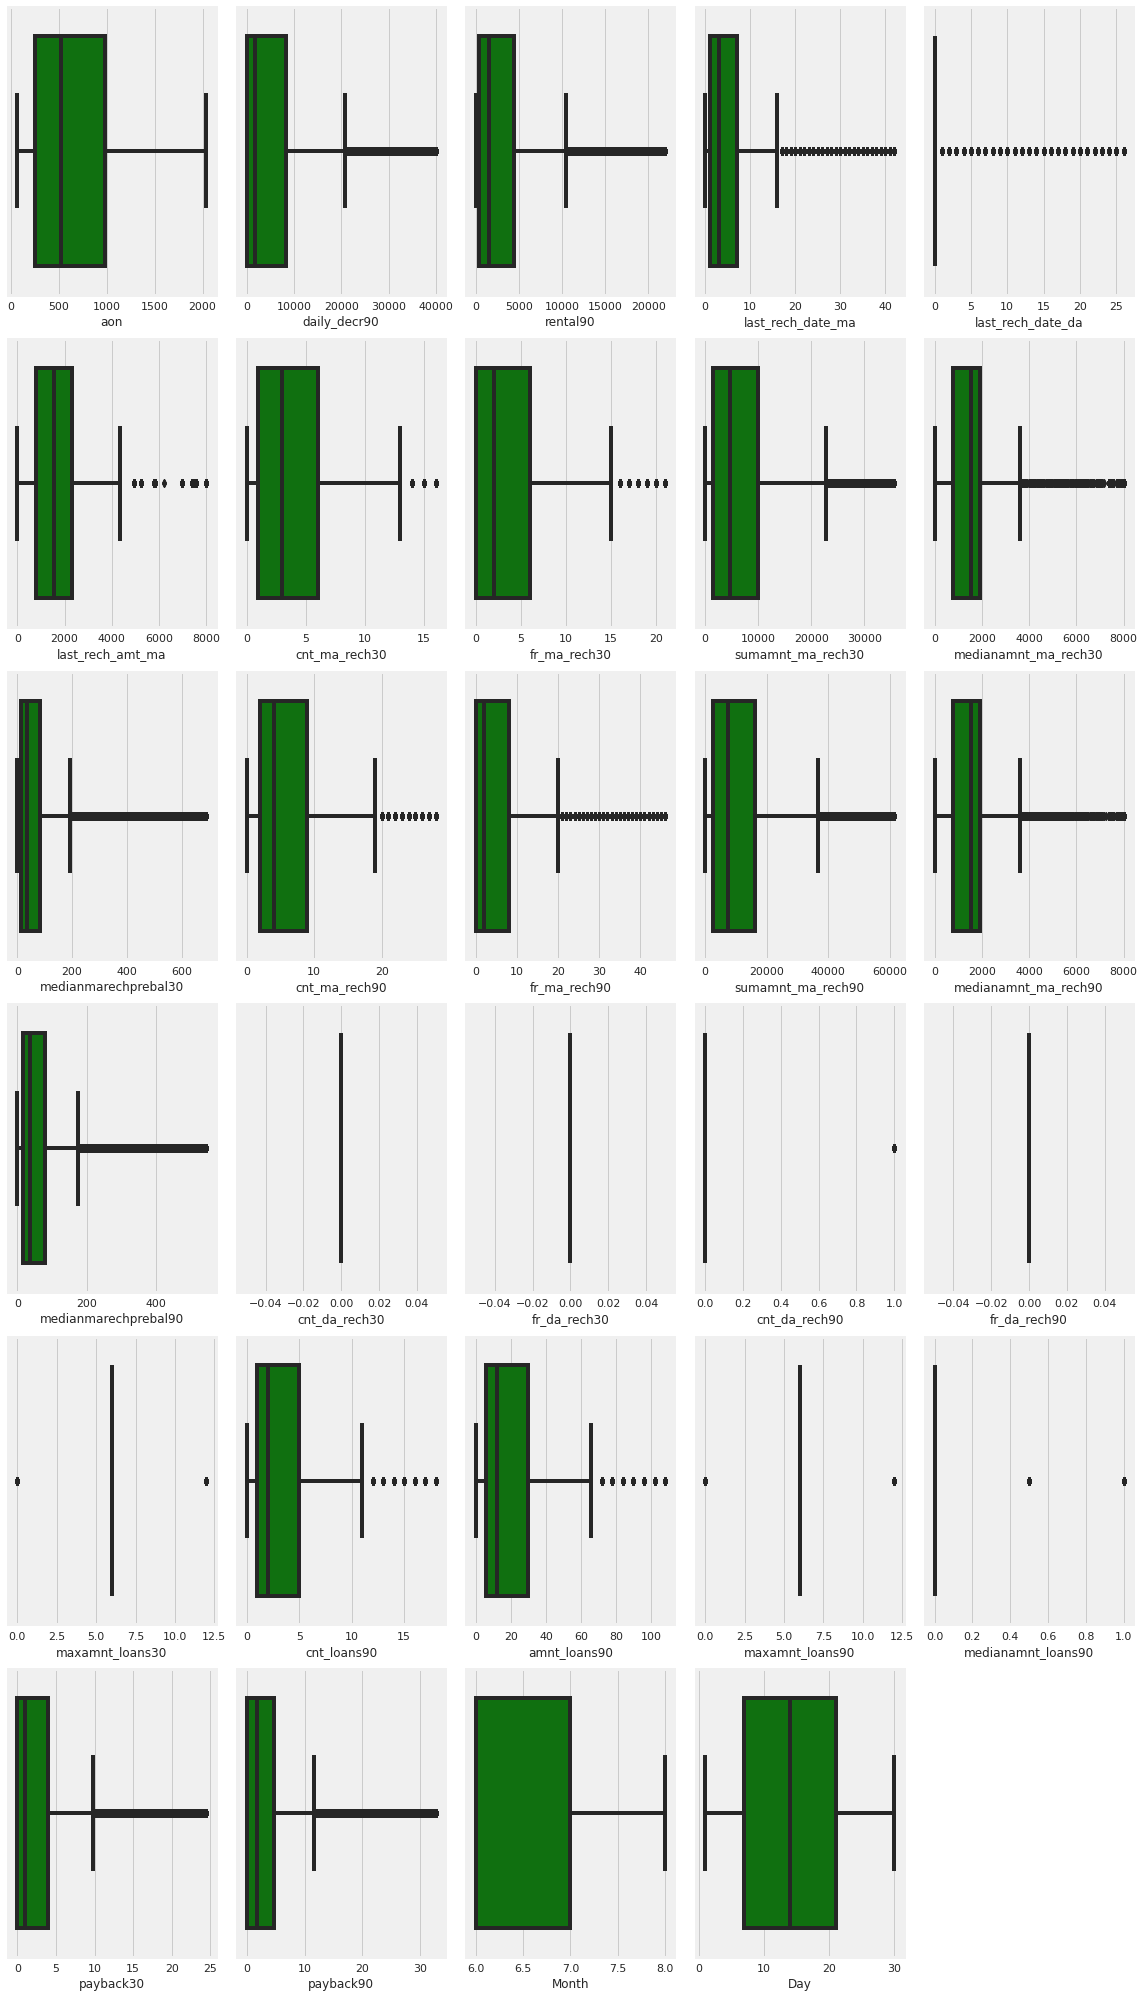

In [ ]:
plt.figure(figsize=(16,32))
for i in range(0, len(X_col)):
  plt.subplot(7,5, i+1)
  ax = sns.boxplot(X[X_col[i]], color='green')
  plt.tight_layout()

# Now **Balance** our data

In [ ]:
x=X

In [ ]:
smote = KMeansSMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)
X_new = pd.DataFrame(X_res, columns=x.columns)
y_new = pd.DataFrame(y_res, columns=['label'])

In [ ]:
print("Before Sampling Shape ---> ", X.shape, y.shape)
print("Afer Sampling Shape ---> ",X_res.shape, y_res.shape)

Before Sampling Shape --->  (197804, 29) (197804,)
Afer Sampling Shape --->  (348850, 29) (348850,)


Text(0.5, 1.0, 'Balanced Data')

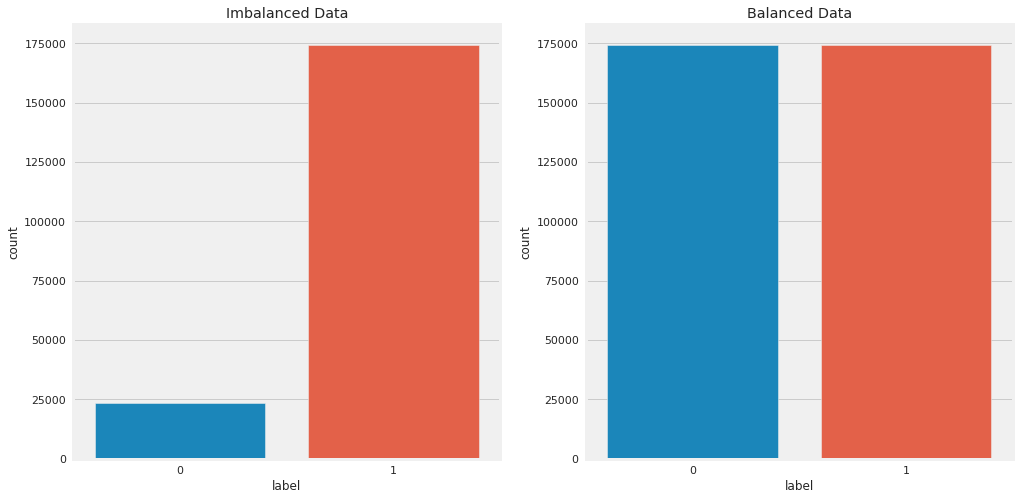

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['label'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['label'])
plt.title('Balanced Data')

**Now our Data has been balanced**

# Lets check **Skewness**

In [ ]:
X_new.skew()

aon                     1.060595
daily_decr90            2.808286
rental90                2.380653
last_rech_date_ma       2.200933
last_rech_date_da       6.315378
last_rech_amt_ma        2.127719
cnt_ma_rech30           1.821738
fr_ma_rech30            1.883980
sumamnt_ma_rech30       2.240943
medianamnt_ma_rech30    2.323104
medianmarechprebal30    3.361609
cnt_ma_rech90           2.094039
fr_ma_rech90            2.168143
sumamnt_ma_rech90       2.444768
medianamnt_ma_rech90    2.289435
medianmarechprebal90    3.118820
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           6.356622
fr_da_rech90            0.000000
maxamnt_loans30         1.930037
cnt_loans90             2.606589
amnt_loans90            2.527948
maxamnt_loans90         2.241040
medianamnt_loans90      4.856042
payback30               2.813663
payback90               2.872791
Month                   0.451630
Day                     0.170605
dtype: float64

My data is fully **Skewed**

# Removing **Skewness**

In [ ]:
X_new = power_transform(X_new, method='yeo-johnson')
X_new = pd.DataFrame(X_new, columns=x.columns)

## Lets check after **Removing Skewness**

In [ ]:
X_new.skew()

aon                    -0.037454
daily_decr90           -0.091217
rental90               -0.100981
last_rech_date_ma       0.040210
last_rech_date_da       4.881200
last_rech_amt_ma       -0.392188
cnt_ma_rech30           0.045658
fr_ma_rech30            0.346341
sumamnt_ma_rech30      -0.404615
medianamnt_ma_rech30   -0.460936
medianmarechprebal30   -0.048183
cnt_ma_rech90           0.040386
fr_ma_rech90            0.283426
sumamnt_ma_rech90      -0.342690
medianamnt_ma_rech90   -0.404153
medianmarechprebal90   -0.061726
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           5.521497
fr_da_rech90            0.000000
maxamnt_loans30         0.488457
cnt_loans90             0.149737
amnt_loans90           -0.083419
maxamnt_loans90         0.407808
medianamnt_loans90      3.645782
payback30               0.596794
payback90               0.462901
Month                   0.083245
Day                    -0.138170
dtype: float64

# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
X_new = pd.DataFrame(X_new, columns=x.columns)

# Lets **Split** into **Train** & **Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.30, random_state=42)

# Now I am going to Apply **Machine Learning**

In [ ]:
models={
    "ExtraTrees Classifier":ExtraTreesClassifier(),
    "RandomForest Classifier":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression(),
    "DecisionTree Classifier":DecisionTreeClassifier(),
    "XGB Classifier":XGBClassifier(),
    "LGBM Classifier":LGBMClassifier()
}

In [ ]:
# NAME=[]
# CVS=[]
# ACCURACY_SCORE=[]
# skf=StratifiedKFold(n_splits=5,shuffle=True)
# for name,model in models.items():
#   NAME.append(name)
#   # font=pyfiglet.figlet_format(name)
#   # print(font)
#   model.fit(X_train,y_train)
#   y_pred=model.predict(X_test)
#   accuracy=accuracy_score(y_test,y_pred)
#   ACCURACY_SCORE.append(accuracy)
#   print("ACCURACY SCORE",accuracy)
#   cvs=cross_val_score(model,X_new,y_new,scoring='accuracy',cv=skf).mean()
#   CVS.append(cvs)
#   print("\n")
#   print("Cross Val Score",cvs*100)
#   cm=confusion_matrix(y_test,y_pred)
#   print("\n")
#   print("Confusion metrics")
#   print(cm)
#   report=classification_report(y_test,y_pred)
#   print("\n")
#   print("Classification Report")
#   print(report)
#   print("\n")
#   #print("Roc Auc Curve")
#   # plt.figure(figsize=(12,8))
#   # roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
#   # #print("Model Learning Curve")
#   # skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
#   # plt.show()

In [ ]:
# models_result=pd.DataFrame({
#     "NAME":NAME,
#     "Cross_Val_Score":CVS, 
#     "Accuracy_Score":ACCURACY_SCORE
# })

In [ ]:
# models_result

**Here I can see LGBM Classifier Giving me Best Accuracy_Score and CSV**

In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,200,500],
    'importance_type': ['split','gain'],
    'max_depth': [-1,1,2,3]
}

In [ ]:
GRID=GridSearchCV(estimator=lgb,scoring='accuracy',param_grid=param,n_jobs=-1,cv=skf)

In [ ]:
# GRID.fit(X_new,y_new)

**Lets Check Best Score**

In [ ]:
# GRID.best_score_

** Checking Our Best Parameters**

In [ ]:
# GRID.best_params_

## I am going to fit into **CatBoostClassifier** & **RandomForestClassifier**

In [ ]:
cat = CatBoostClassifier()
rf = RandomForestClassifier()

# Fitting into CatBoostClassiier
cat.fit(X_train, y_train)
cat.score(X_test, y_test)
cat_pred = cat.predict(X_test)
print("Accuracy Score of CatBoostClassifier --> ", accuracy_score(y_test, cat_pred))
print("Calssification Report of CatBoostClassifier --> ", classification_report(y_test, cat_pred))
print("Cunfusion Metrix of CatBoostClassifier --> ", confusion_matrix(y_test, cat_pred))

# Now Fitting into RandomForestClassifier
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
rf_pred = cat.predict(X_test)
print("Accuracy Score of RandomForestClassifier --> ", accuracy_score(y_test, rf_pred))
print("Calssification Report of RandomForestClassifier --> ", classification_report(y_test, rf_pred))
print("Cunfusion Metrix of RandomForestClassifier --> ", confusion_matrix(y_test, rf_pred))


Learning rate set to 0.10777
0:	learn: 0.5904871	total: 171ms	remaining: 2m 50s
1:	learn: 0.5291479	total: 251ms	remaining: 2m 5s
2:	learn: 0.4961107	total: 343ms	remaining: 1m 54s
3:	learn: 0.4696547	total: 425ms	remaining: 1m 45s
4:	learn: 0.4476389	total: 500ms	remaining: 1m 39s
5:	learn: 0.4229084	total: 582ms	remaining: 1m 36s
6:	learn: 0.3949256	total: 670ms	remaining: 1m 35s
7:	learn: 0.3781474	total: 748ms	remaining: 1m 32s
8:	learn: 0.3562710	total: 822ms	remaining: 1m 30s
9:	learn: 0.3429425	total: 910ms	remaining: 1m 30s
10:	learn: 0.3319250	total: 983ms	remaining: 1m 28s
11:	learn: 0.3219461	total: 1.05s	remaining: 1m 26s
12:	learn: 0.3153136	total: 1.13s	remaining: 1m 25s
13:	learn: 0.3026637	total: 1.2s	remaining: 1m 24s
14:	learn: 0.2947766	total: 1.27s	remaining: 1m 23s
15:	learn: 0.2894783	total: 1.36s	remaining: 1m 23s
16:	learn: 0.2836022	total: 1.44s	remaining: 1m 23s
17:	learn: 0.2771634	total: 1.51s	remaining: 1m 22s
18:	learn: 0.2729681	total: 1.59s	remaining: 1m

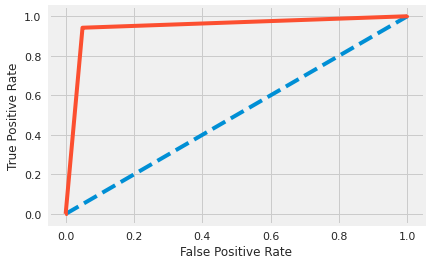

In [ ]:
ns_probs=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_probs)
lr_auc=roc_auc_score(y_test,y_pred)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_probs)
lr_fpr,lr_tpr,_=roc_curve(y_test,y_pred)
pyplot.plot(ns_fpr,ns_tpr,linestyle='--')
pyplot.plot(lr_fpr,lr_tpr,marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

## In this case we should reduce the **False Negative**

In [ ]:
THRESHOLD = 0.1
y_predicts = np.where(cat.predict_proba(X_test)[:,1]> THRESHOLD, 1,0)

In [ ]:
cmatrix = confusion_matrix(y_test, y_predicts)

Now see the **Heatmap**

In [ ]:
sns.heatmap(cmatrix, annot=True, cmap='Blues')

In [ ]:
print(cmatrix)

[[45414  6898]
 [   67 52276]]


In [ ]:
cat.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10777000337839128,
 'loss_function': 'Logloss',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 

# Now i am going to fit into **LGBMClassifier**

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

lgb_y_pred=lgb.predict(X_test)

In [ ]:
accuracy_score(y_test, lgb_y_pred)

0.9516602169031579

In [ ]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter Tuning

In [ ]:
param_grid = [
              {"n_esimators":[400, 500]
               }
]

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

AttributeError: ignored

In [ ]:
rf_model = grid_search.best_estimator_
y_pred_ = rf_model.predict(X_test)

AttributeError: ignored

In [ ]:
accuracy_score(y_test, y_pred_)

NameError: ignored

In [ ]:
joblib.dump(rf_model, 'credit_model.obj')

# Now Start **ANN**

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[29], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")
]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 29)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               9000      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 39,201
Trainable params: 39,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LOSS_FUNCTION = "BinaryCrossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [ ]:
EPOCHS = 50

VALIDATION_SET = (X_test, y_test)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET, batch_size=4)

Epoch 1/50
61049/61049 [==============================] - 199s 3ms/step - loss: 0.3209 - accuracy: 0.8573 - val_loss: 0.2843 - val_accuracy: 0.8763
Epoch 2/50
61049/61049 [==============================] - 192s 3ms/step - loss: 0.2787 - accuracy: 0.8780 - val_loss: 0.2630 - val_accuracy: 0.8848
Epoch 3/50
61049/61049 [==============================] - 182s 3ms/step - loss: 0.2672 - accuracy: 0.8828 - val_loss: 0.2566 - val_accuracy: 0.8896
Epoch 4/50
61049/61049 [==============================] - 179s 3ms/step - loss: 0.2600 - accuracy: 0.8864 - val_loss: 0.2633 - val_accuracy: 0.8843
Epoch 5/50
61049/61049 [==============================] - 191s 3ms/step - loss: 0.2557 - accuracy: 0.8891 - val_loss: 0.2482 - val_accuracy: 0.8916
Epoch 6/50
61049/61049 [==============================] - 188s 3ms/step - loss: 0.2531 - accuracy: 0.8897 - val_loss: 0.2494 - val_accuracy: 0.8926
Epoch 7/50
61049/61049 [==============================] - 197s 3ms/step - loss: 0.2501 - accuracy: 0.8911 - val_